In [2]:
import pandas as pd
import numpy as np
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, LSTM, Dropout
# import tensorflow as tf

In [141]:
Data2 = pd.read_csv(r'D:\Desktop\현대제철\continuous_factory_process.csv')
del Data2['time_stamp']
def stz(Data):
    return (Data - Data.mean())/Data.std()
stz_Data2 = stz(Data2)
stz_Data2.head()

,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,Machine1.MotorAmperage.U.Actual,...,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement10.U.Setpoint,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement11.U.Setpoint,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
0,1.605763,-0.83964,-0.609936,-0.489071,0.089373,-0.566706,-0.015695,-0.210982,0.706092,-4.036603,...,-4.578944,0.999965,-4.58121,0.999965,-4.758437,0.999965,-7.414157,0.999965,-3.608144,-0.999965
1,1.605763,-0.83964,-0.609936,-0.489071,0.089373,-0.566706,0.034699,-0.210982,0.706092,-4.036603,...,-4.578944,0.999965,-4.58121,0.999965,-4.758437,0.999965,-7.414157,0.999965,-3.608144,-0.999965
2,1.605763,-0.83964,-0.609936,-0.489071,0.089373,-0.566706,0.036785,-0.210982,0.706092,-4.013075,...,-4.578944,0.999965,-4.58121,0.999965,-4.758437,0.999965,-7.414157,0.999965,-3.608144,-0.999965
3,1.605763,-0.83964,-0.609936,-0.489071,0.089373,-0.566706,0.050349,-0.210982,0.706092,-3.938870,...,-4.578944,0.999965,-4.58121,0.999965,-4.758437,0.999965,-7.414157,0.999965,-3.608144,-0.999965
4,1.605763,-0.83964,-0.609936,-0.489071,0.089373,-0.566706,0.105020,1.371723,0.952208,-3.938870,...,-4.578944,0.999965,-4.58121,0.999965,-4.758437,0.999965,-7.414157,0.999965,-3.608144,-0.999965


In [159]:
stz_Data2.shape

(14088, 115)

In [4]:
del Data['date']
for i in range(len(Data.columns)):
    Data[Data.columns[i]] = Data[Data.columns[i]].str.replace(',', '.').astype('float16')
Data.head()
# Data = Data.apply(pd.to_numeric)
# Data.dtypes

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,55.1875,16.984375,3020.0,557.5,395.75,10.062500,1.740234,249.250,253.250,250.625,...,250.875,457.50,433.00,425.00,443.50,502.25,446.25,523.50,66.9375,1.30957
1,55.1875,16.984375,3024.0,564.0,397.50,10.070312,1.740234,249.750,250.500,250.875,...,249.000,452.00,429.50,433.00,448.00,496.25,446.00,498.00,66.9375,1.30957
2,55.1875,16.984375,3044.0,568.0,399.75,10.070312,1.740234,249.750,247.875,250.375,...,248.125,451.25,469.00,434.50,449.75,484.50,447.75,458.50,66.9375,1.30957
3,55.1875,16.984375,3048.0,568.5,398.00,10.070312,1.740234,249.875,254.500,250.000,...,251.125,452.50,458.25,442.75,446.25,471.50,437.75,427.75,66.9375,1.30957
4,55.1875,16.984375,3034.0,558.0,400.25,10.070312,1.740234,250.250,252.125,249.875,...,248.875,452.50,453.00,450.50,453.75,462.50,443.75,425.75,66.9375,1.30957


In [99]:
Data1.std()

% Iron Feed                        5.157744
% Silica Feed                      6.807439
Starch Flow                     1215.203734
Amina Flow                        91.230534
Ore Pulp Flow                      9.699785
Ore Pulp pH                        0.387007
Ore Pulp Density                   0.069249
Flotation Column 01 Air Flow      29.621288
Flotation Column 02 Air Flow      30.149357
Flotation Column 03 Air Flow      28.558268
Flotation Column 04 Air Flow       2.572538
Flotation Column 05 Air Flow       3.636579
Flotation Column 06 Air Flow      30.217804
Flotation Column 07 Air Flow      28.670105
Flotation Column 01 Level        131.014924
Flotation Column 02 Level        128.165050
Flotation Column 03 Level        150.842164
Flotation Column 04 Level         91.794432
Flotation Column 05 Level         84.535822
Flotation Column 06 Level         89.862225
Flotation Column 07 Level         84.891491
% Iron Concentrate                 1.118645
% Silica Concentrate            

In [75]:
# Data.to_csv(r'D:\Desktop\현대제철\Mining.csv',header=True, index=False)

def stz(Data):
    return (Data - Data.iloc[:10].mean())/Data.iloc[:10].std()

stz_Data = stz(Data)
stz_Data.head()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,NaN,NaN,-1.129883,-1.062500,-0.294678,0.000000,NaN,-1.763672,0.779785,1.187500,...,0.125122,1.952148,-1.272461,-1.715820,-0.381348,1.642578,-0.119629,2.087891,NaN,-inf
1,NaN,NaN,-1.056641,0.318604,0.392822,3.167969,NaN,-0.587891,-0.540039,1.485352,...,-0.813477,0.650879,-1.472656,-1.119141,0.190674,1.381836,-0.149536,1.307617,NaN,-inf
2,NaN,NaN,-0.692383,1.168945,1.277344,3.167969,NaN,-0.587891,-1.799805,0.891113,...,-1.250977,0.473145,0.786621,-1.006836,0.413086,0.870117,0.059814,0.099426,NaN,-inf
3,NaN,NaN,-0.619629,1.274414,0.589355,3.167969,NaN,-0.293945,1.379883,0.445557,...,0.250244,0.769043,0.171631,-0.391602,-0.031769,0.304443,-1.136719,-0.841309,NaN,-inf
4,NaN,NaN,-0.874512,-0.956055,1.473633,3.167969,NaN,0.587891,0.239868,0.296875,...,-0.875977,0.769043,-0.128662,0.186523,0.921387,-0.087036,-0.418701,-0.902344,NaN,-inf


In [ ]:
type(Data)

In [265]:
window_size = 100

# X_Data = pd.Panel({'index{}'.format(i+1) :stz_Data2[stz_Data2.columns[:41]].iloc[i:i+window_size].reset_index(drop=True) for i in range(14088 - window_size)})
X_data = stz_Data2[stz_Data2.columns[:41]].iloc[window_size:14088].reset_index(drop=True)
Y_Data = stz_Data2[stz_Data2.columns[43:46]].iloc[window_size:14088].reset_index(drop=True)
print(X_data.shape)
print(Y_Data.shape)
del Y_Data['Stage1.Output.Measurement1.U.Setpoint']
# del Y_Data['Stage1.Output.Measurement2.U.Setpoint']
# del Y_Data['Stage1.Output.Measurement3.U.Setpoint']
# del Y_Data['Stage1.Output.Measurement4.U.Setpoint']
# del Y_Data['Stage1.Output.Measurement5.U.Setpoint']

(13988, 41)
(13988, 3)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000188E88E3AC8>,
      dtype=object)

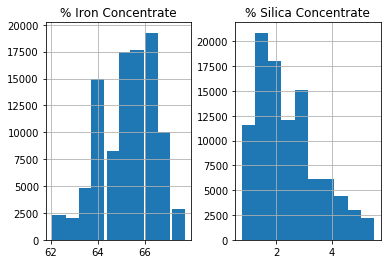

In [22]:
Y_Data = Data[Data.columns[-2:]].iloc[window_size:14088].reset_index(drop=True)
Y_Data.hist()

In [266]:
import numpy as np

# X_Data = np.array(X_Data).reshape(13988,100,41,1)
# Y_Data = np.array(Y_Data)

print(X_data.shape)
print(Y_Data.shape)

X_train = X_data.iloc[:10000]
Y_train = Y_Data.iloc[:10000]

(13988, 41)
(13988, 2)


In [ ]:
def stz(Data):
    return (Data - Data.mean())/Data.std()

def norm(Data, norm_min=1, norm_max=2):
    return (Data - Data.min())/(Data.max() - Data.min())*(norm_max - norm_min) + norm_min

Y_Data = Data.pop(Data.columns[-1])
Y_Data = Y_Data.replace(1,0)
Y_Data = Y_Data.replace(2,1)
B_X_Data = Data.iloc[:,[11,12,27,28,29,30,31,32]]
F_X_Data = Data.drop(Data.columns[[11,12,27,28,29,30,31,32]],axis=1)

stz_F_X_Data = stz(F_X_Data)
norm_F_X_Data = norm(stz_F_X_Data)

norm_Data = pd.merge(norm_F_X_Data, B_X_Data, left_on=norm_F_X_Data.columns[-1], right_index=True)
train_Data = norm_Data.sample(frac=0.7)
test_Data = norm_Data.drop(train_Data.index)

train_target = Y_Data.iloc[train_Data.index]
test_target = Y_Data.iloc[test_Data.index]

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape=(len(Data.columns), )),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
model.fit(train_Data, train_target, batch_size = 100, validation_split = 0.3, epochs=500, verbose=1)

In [ ]:
window_size = 20
X_Data = pd.Panel({'index{}'.format(i+1) : Data[Data.columns[1:42]].iloc[i:i+window_size].reset_index(drop=True) for i in range(len(Data)-window_size)})
X_Data.shape

In [ ]:
aa = list(Data['Stage1.Output.Measurement0.U.Setpoint'][Data['Stage1.Output.Measurement2.U.Actual']<=5].index)
bb = list(Data['Stage1.Output.Measurement0.U.Setpoint'][Data['Stage1.Output.Measurement2.U.Actual']>=15].index)
cc = aa+bb

yy = [[1,0] for i in range(len(X_Data))]
for i in range(len(cc)):
    yy[cc[i]] = [0,1]
    
yy = np.array(yy)
print(yy.shape)

yy = yy[window_size:]

In [ ]:
Y_train = yy[:10000]

In [ ]:
Y_Data = Data[Data.columns[42:44]].iloc[window_size*2:].reset_index(drop=True)
Y_Data.shape

In [ ]:
import numpy as np
X_Data = np.array(X_Data).reshape(14068,20,41,1)
X_Data.shape

In [ ]:
X_train = X_Data[:10000]
Y_Data = np.array(Y_Data)
Y_train = Y_Data[:10000]
print(X_train.shape)
print(Y_train.shape)

In [ ]:
window_size = 40

def makedataset(Data):
    
    x_data = pd.Panel({'index{}'.format(i+1) : Data[Data.columns[1:42]].iloc[i:i+window_size].reset_index(drop=True) for i in range(len(Data)-window_size)})
    y_data = Data[Data.columns[42:46]].iloc[window_size:].reset_index(drop=True)
    
    return x_data, y_data

Data_X, Data_Y = makedataset(Data)

In [ ]:
def basic_cnn():
    model = Sequential()
    # dense layer with 50 neurons
    model.add(Dense(20,input_dim=5, activation = 'tanh'))
    model.add(Dense(20, activation = 'tanh'))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(1))

    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'mean_squared_error', optimizer = adam)

    return model

model = basic_cnn()
model.summary()

In [ ]:
history = model.fit(All_Data[All_Data.columns[:-1]].iloc[:250], All_Data[All_Data.columns[-1:]].iloc[:250], batch_size = 50, validation_split = 0, epochs = 500, verbose = 1)

In [256]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D



def basic_cnn():
    model = Sequential()

    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2],X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=50, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Conv2D(filters=50, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=50, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Conv2D(filters=50, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=50, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    model.add(Conv2D(filters=50, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=50, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))


    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(10, activation = 'elu'))
#     model.add(Dense(4, activation = 'elu'))
#     model.add(Dense(2, activation = 'elu'))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(6))

    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'mean_squared_error', optimizer = adam)

    return model

model = basic_cnn()
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 100, 41, 50)       500       
_________________________________________________________________
activation_68 (Activation)   (None, 100, 41, 50)       0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 100, 41, 50)       22550     
_________________________________________________________________
activation_69 (Activation)   (None, 100, 41, 50)       0         
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 50, 20, 50)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 50, 20, 50)        22550     
_________________________________________________________________
activation_70 (Activation)   (None, 50, 20, 50)      

In [257]:
history = model.fit(X_train, Y_train, batch_size = 500, validation_split = 0.1, epochs = 10, verbose = 1)

Train on 9000 samples, validate on 1000 samples
Epoch 1/10
9000/9000 [==============================] - 8s 936us/sample - loss: 0.8247 - val_loss: 1.8026
Epoch 2/10
9000/9000 [==============================] - 7s 768us/sample - loss: 0.7376 - val_loss: 1.9703
Epoch 3/10
9000/9000 [==============================] - 7s 772us/sample - loss: 0.6557 - val_loss: 1.9769
Epoch 4/10
9000/9000 [==============================] - 7s 773us/sample - loss: 0.5527 - val_loss: 1.8236
Epoch 5/10
9000/9000 [==============================] - 7s 775us/sample - loss: 0.4814 - val_loss: 1.9088
Epoch 6/10
9000/9000 [==============================] - 7s 776us/sample - loss: 0.4302 - val_loss: 1.8946
Epoch 7/10
9000/9000 [==============================] - 7s 778us/sample - loss: 0.3988 - val_loss: 1.8776
Epoch 8/10
9000/9000 [==============================] - 7s 779us/sample - loss: 0.3798 - val_loss: 1.8632
Epoch 9/10
9000/9000 [==============================] - 7s 781us/sample - loss: 0.3655 - val_loss: 1.904

In [ ]:
import tensorflow.keras.backend as K
from tensorflow.python.framework import ops

def generate_grad_cam(img_tensor, model, class_index, activation_layer):
    """
    params:
    -------
    img_tensor: resnet50 모델의 이미지 전처리를 통한 image tensor
    model: pretrained resnet50 모델 (include_top=True)
    class_index: 이미지넷 정답 레이블
    activation_layer: 시각화하려는 레이어 이름

    return:
    grad_cam: grad_cam 히트맵
    """
    inp = model.input
    y_c = model.output.op.inputs[0][0, class_index]
    A_k = model.get_layer(activation_layer).output
    
    ## 이미지 텐서를 입력해서
    ## 해당 액티베이션 레이어의 아웃풋(a_k)과
    ## 소프트맥스 함수 인풋의 a_k에 대한 gradient를 구한다.
    get_output = K.function([inp], [A_k, K.gradients(y_c, A_k)[0], model.output])
    [conv_output, grad_val, model_output] = get_output([img_tensor])

    ## 배치 사이즈가 1이므로 배치 차원을 없앤다.
    conv_output = conv_output[0]
    grad_val = grad_val[0]
    
    ## 구한 gradient를 픽셀 가로세로로 평균내서 a^c_k를 구한다.
    weights = np.mean(grad_val, axis=(0, 1))
    
    ## 추출한 conv_output에 weight를 곱하고 합하여 grad_cam을 얻는다.
    grad_cam = np.zeros(dtype=np.float32, shape=conv_output.shape[0:2])
    for k, w in enumerate(weights):
        grad_cam += w * conv_output[:, :, k]
    
    grad_cam = cv2.resize(grad_cam, (224, 224))

    ## ReLU를 씌워 음수를 0으로 만든다.
    grad_cam = np.maximum(grad_cam, 0)

    grad_cam = grad_cam / grad_cam.max()
    return grad_cam

generate_grad_cam(X_Data[0],model,[67,1], "max_pooling2d_3")

In [258]:
aa = pd.DataFrame(model.predict(X_Data),columns=['Pred1','Pred2','Pred3','Pred4','Pred5','Pred6'])
aa.head()

,Pred1,Pred2,Pred3,Pred4,Pred5,Pred6
0,0.631857,-0.286669,0.109358,0.007476,-0.180588,0.699855
1,0.495430,-0.266115,-0.051082,-0.125315,-0.285313,0.513818
2,-0.070881,0.011295,0.133186,-0.455743,-0.091630,1.328394
3,0.217974,0.370401,0.118294,-0.589813,-0.582301,2.215344
4,0.395385,0.238709,0.317650,-0.615474,-0.300683,2.786088


Text(0.5, 1.0, 'Iron Concentration (%)')

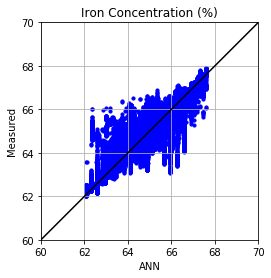

In [101]:
plt.gca().set_aspect('equal')
plt.scatter(Y_Data[:,0]*1.118645 + 65.05068,aa[aa.columns[0]]*1.118645 + 65.05068,s=10,color='blue')
plt.plot([60,70],[60,70],color='k',linewidth=1.5)
plt.axis([60,70,60,70])
plt.grid(True)

plt.xlabel('ANN')
plt.ylabel('Measured')
plt.title('Iron Concentration (%)')
# plt.scatter(Y_Data[:,1],aa[aa.columns[1]])

Text(0.5, 1.0, 'Iron Concentration (%)')

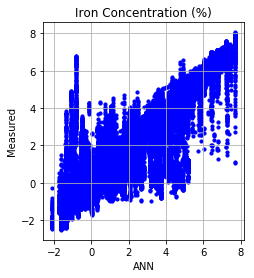

In [105]:
plt.gca().set_aspect('equal')
plt.scatter(Y_Data[:,1]*2.326763 + 1.125554,aa[aa.columns[1]]*2.326763 + 1.125554,s=10,color='blue')
# plt.plot([60,70],[60,70],color='k',linewidth=1.5)
# plt.axis([60,70,60,70])
plt.grid(True)

plt.xlabel('ANN')
plt.ylabel('Measured')
plt.title('Iron Concentration (%)')
# plt.scatter(Y_Data[:,1],aa[aa.columns[1]])

In [124]:
def ARE(D,M):
    return (1 - abs((D - M)/D)).mean()*100

ARE(stz_Data[stz_Data.columns[-2]]*1.118645+65.050068,aa[aa.columns[0]]*1.118645+65.050068)

98.97488031881082

In [138]:
def RMSE(D,N):
    return (((D - N)**2).mean())**0.5

RMSE(Y_Data[:,1]*1.125554 + 2.326763,aa[aa.columns[1]]*1.125554 + 2.326763)

0.4058390085924082

Text(0.5, 1.0, 'FCNN algorithm')

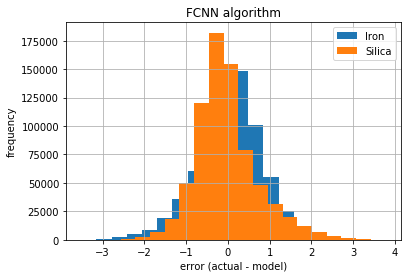

In [120]:
(stz_Data[stz_Data.columns[-2]] - aa[aa.columns[0]]).hist(bins=20,label='Iron')
(stz_Data[stz_Data.columns[-1]] - aa[aa.columns[1]]).hist(bins=20,label='Silica')
plt.legend()
plt.xlabel('error (actual - model)')
plt.ylabel('frequency')
plt.title('FCNN algorithm')

Text(0.5, 1.0, 'Iron Concentration (%)')

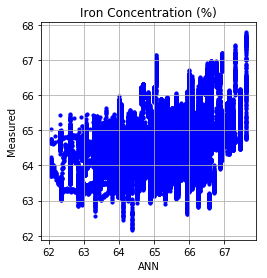

In [28]:
plt.gca().set_aspect('equal')
plt.scatter(Y_Data[:,0],aa[aa.columns[0]],s=10,color='blue')
# plt.plot([0,10],[0,10],color='k',linewidth=1.5)
# plt.axis([0,10,0,10])
plt.grid(True)

plt.xlabel('ANN')
plt.ylabel('Measured')
plt.title('Iron Concentration (%)')

In [ ]:
# x = np.linspace(1,10,100)
# y = x**2 + 1 

# a = pd.DataFrame()
# a['X'] = x
# a['Y'] = y
# a
# window_size = 10
# X_Data = pd.Panel({'index{}'.format(i+1) : a.iloc[i:i+window_size].reset_index(drop=True) for i in range(len(a) - window_size)})
# X_Data = np.array(X_Data).reshape(90,10,2,1)
plt.gca().set_aspect('equal')
plt.scatter(All_Data['Dsm/R'].iloc[:250],np.array(model.predict(All_Data[All_Data.columns[:-1]].iloc[:250]).flatten()),color='blue',s=10,label='train data')
plt.scatter(All_Data['Dsm/R'].iloc[250:],np.array(model.predict(All_Data[All_Data.columns[:-1]].iloc[250:]).flatten()),color='red',s=10,label='extra data')
plt.plot([-2,3],[-2,3],color='k')

plt.axis([-2,3,-2,3])
plt.grid(True)
plt.legend()

In [ ]:
plt.plot(x[10:],y[10:],color='k',linewidth=2,label='actual    $y = x^2 + 1$')
plt.scatter(x[10:],model.predict(X_Data).flatten(),s=10, color='red',label='Model prediction')
plt.grid(True)
plt.legend()

In [ ]:
#  model.predict(X_Data)[0][i], 
plt.plot([i for i in range(len(Y_Data))],Y_Data['Stage1.Output.Measurement2.U.Actual'],label='Manufacturing')
plt.plot([i for i in range(len(Y_Data))],aa['output1'],label='Model prediction')
plt.legend()

In [ ]:
plt.plot([i for i in range(len(Y_Data))],Y_Data['Stage1.Output.Measurement0.U.Setpoint'],label='Manufacturing')
plt.plot([i for i in range(len(Y_Data))],aa['output2'],label='Model prediction')
plt.legend()

In [ ]:
plt.plot([i for i in range(len(Y_Data))],Y_Data['Stage1.Output.Measurement1.U.Actual'],label='Manufacturing')
plt.plot([i for i in range(len(Y_Data))],aa['output3'],label='Model prediction')
plt.legend()

In [ ]:
plt.plot([i for i in range(len(Y_Data))],Y_Data['Stage1.Output.Measurement1.U.Setpoint'],label='Manufacturing')
plt.plot([i for i in range(len(Y_Data))],aa['output4'],label='Model prediction')
plt.legend()

In [ ]:
plt.plot([i for i in range(len(Y_Data))],Y_Data['Stage1.Output.Measurement2.U.Actual'],label='Manufacturing')
plt.plot([i for i in range(len(Y_Data))],aa['output5'],label='Model prediction')
plt.legend()

In [ ]:
plt.plot([i for i in range(len(Y_Data))],Y_Data['Stage1.Output.Measurement2.U.Setpoint'],label='Manufacturing')
plt.plot([i for i in range(len(Y_Data))],aa['output6'],label='Model prediction')
plt.legend()

In [ ]:
def stz(Data):
    return (Data - Data.mean())/Data.std()

def norm(Data, min_norm=-0.9, max_norm=0.9):
    return (Data - Data.min())/(Data.max() - Data.min())*(max_norm - min_norm) + min_norm

stz_Data = stz(Data)
norm_Data = norm(Data)

All_Data = pd.DataFrame()
All_Data[Data.columns[0:3]] = norm_Data[Data.columns[0:3]]
All_Data[Data.columns[3]] = stz_Data[Data.columns[3]]
All_Data[Data.columns[4]] = norm_Data[Data.columns[4]]
All_Data[Data.columns[5]] = stz_Data[Data.columns[5]]

In [ ]:
All_Data['dist'] = ((All_Data - All_Data.min())**2).sum(axis=1)

All_Data = All_Data.sort_values(['dist'],ascending=True)
All_Data['index'] = All_Data.index
All_Data = All_Data.reset_index(drop=True)
All_Data

In [ ]:
All_Data[All_Data.columns[:-2]].iloc[0:3]
All_Data[All_Data.columns[-3]].iloc[3]

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(2,2), input_shape=(3,6,1), activation='relu',padding='same'))
model.add(Conv2D(32, (2,2), activation='relu'))
model.add(MaxPooling2D(pool_size= (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

model.compile(loss='mean_squared_error',
              optimizer='adam')

for epochs in range(100):
    model.fit(np.reshape(np.array(All_Data[All_Data.columns[:-2]].iloc[epochs:epochs+3]).reshape(3,6,1), (1,3,6,1)), All_Data[All_Data.columns[-3]].iloc[epochs+3], epochs=1)


In [ ]:
import numpy as np
np.reshape(np.array(All_Data[All_Data.columns[:-2]].iloc[0:3]).reshape(3,6,1), (1,3,6,1)).shape

In [ ]:
!pip install opencv

In [ ]:
Data = pd.read_csv(r'D:\Desktop\현대제철\steel-plates-fault_csv.csv')

def stz(Data):
    return (Data - Data.mean())/Data.std()

def norm(Data, norm_min=1, norm_max=2):
    return (Data - Data.min())/(Data.max() - Data.min())*(norm_max - norm_min) + norm_min

Y_Data = Data.pop(Data.columns[-1])
Y_Data = Y_Data.replace(1,0)
Y_Data = Y_Data.replace(2,1)
B_X_Data = Data.iloc[:,[11,12,27,28,29,30,31,32]]
F_X_Data = Data.drop(Data.columns[[11,12,27,28,29,30,31,32]],axis=1)

stz_F_X_Data = stz(F_X_Data)
norm_F_X_Data = norm(stz_F_X_Data)

norm_Data = pd.merge(norm_F_X_Data, B_X_Data, left_on=norm_F_X_Data.columns[-1], right_index=True)
train_Data = norm_Data.sample(frac=0.7)
val_Data = norm_Data.drop(train_Data.index).sample(frac=0.66)
test_Data = norm_Data.drop(train_Data.index).drop(val_Data.index)

train_target = Y_Data.iloc[train_Data.index]
val_target = Y_Data.iloc[val_Data.index]
test_target = Y_Data.iloc[test_Data.index]

In [267]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

model = Sequential([
    Dense(20, activation='relu', input_dim=41),
    Dense(20, activation='relu'),
    Dense(20, activation='relu'),
    Dense(20, activation='relu'),
    Dense(20, activation='relu'),
    Dense(20, activation='relu'),
    Dense(20, activation='relu'),
    Dense(20, activation='relu'),
    Dense(2)
])

model.compile(optimizer='adam',
              loss='mean_squared_error')
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 20)                840       
_________________________________________________________________
dense_89 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_90 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_91 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_92 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_93 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_94 (Dense)             (None, 20)              

In [268]:
model.fit(X_train, Y_train, epochs=50, verbose=1)

Train on 10000 samples
Epoch 1/50
10000/10000 [==============================] - 3s 257us/sample - loss: 0.6929
Epoch 2/50
10000/10000 [==============================] - 1s 150us/sample - loss: 0.5815
Epoch 3/50
10000/10000 [==============================] - 2s 151us/sample - loss: 0.5008
Epoch 4/50
10000/10000 [==============================] - 2s 164us/sample - loss: 0.4598
Epoch 5/50
10000/10000 [==============================] - 1s 145us/sample - loss: 0.4173
Epoch 6/50
10000/10000 [==============================] - 2s 166us/sample - loss: 0.3837
Epoch 7/50
10000/10000 [==============================] - 2s 150us/sample - loss: 0.3688
Epoch 8/50
10000/10000 [==============================] - 1s 150us/sample - loss: 0.3751
Epoch 9/50
10000/10000 [==============================] - 1s 147us/sample - loss: 0.3589
Epoch 10/50
10000/10000 [==============================] - 1s 147us/sample - loss: 0.3485
Epoch 11/50
10000/10000 [==============================] - 1s 146us/sample - loss: 0.3

In [269]:
aa = pd.DataFrame(model.predict(X_data),columns=['Pred1','Pred2'])
aa.head()

,Pred1,Pred2
0,0.494083,0.288964
1,0.532378,0.301198
2,0.507559,0.288257
3,0.477563,0.271463
4,0.484461,0.263322


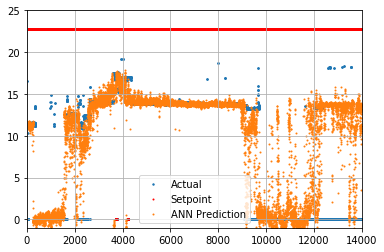

In [270]:
plt.scatter([i for i in range(len(Y_Data))],stz_Data2[stz_Data2.columns[43]].iloc[:14088-window_size]*Data2[Data2.columns[43]].std()+Data2[Data2.columns[43]].mean(),s=2,label='Actual')
plt.scatter([i for i in range(len(Y_Data))],stz_Data2[stz_Data2.columns[44]].iloc[:14088-window_size]*Data2[Data2.columns[44]].std()+Data2[Data2.columns[44]].mean(),s=1,color='red',label='Setpoint')
plt.scatter([i for i in range(len(Y_Data))],aa['Pred1']*Data2[Data2.columns[43]].std()+Data2[Data2.columns[43]].mean(),s=1,label='ANN Prediction')

plt.axis([0,14000,-1,25])
plt.legend()
plt.grid(True)

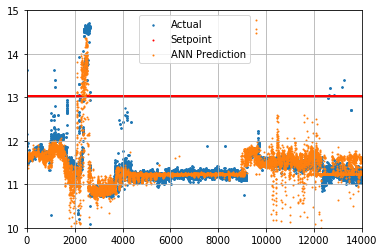

In [271]:
plt.scatter([i for i in range(len(Y_Data))],stz_Data2[stz_Data2.columns[45]].iloc[:14088-window_size]*Data2[Data2.columns[45]].std()+Data2[Data2.columns[45]].mean(),s=2,label='Actual')
plt.scatter([i for i in range(len(Y_Data))],stz_Data2[stz_Data2.columns[46]].iloc[:14088-window_size]*Data2[Data2.columns[46]].std()+Data2[Data2.columns[46]].mean(),s=1,color='red',label='Setpoint')
plt.scatter([i for i in range(len(Y_Data))],aa['Pred2']*Data2[Data2.columns[45]].std()+Data2[Data2.columns[45]].mean(),s=1,label='ANN Prediction')

plt.axis([0,14000,10,15])
plt.legend()
plt.grid(True)

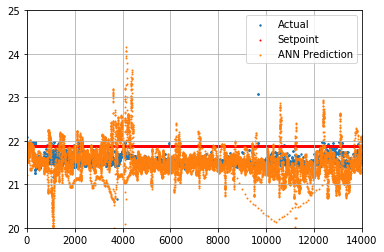

In [261]:
plt.scatter([i for i in range(len(Y_Data))],stz_Data2[stz_Data2.columns[47]].iloc[:14088-window_size]*Data2[Data2.columns[47]].std()+Data2[Data2.columns[47]].mean(),s=2,label='Actual')
plt.scatter([i for i in range(len(Y_Data))],stz_Data2[stz_Data2.columns[48]].iloc[:14088-window_size]*Data2[Data2.columns[48]].std()+Data2[Data2.columns[48]].mean(),s=1,color='red',label='Setpoint')
plt.scatter([i for i in range(len(Y_Data))],aa['Pred3']*Data2[Data2.columns[47]].std()+Data2[Data2.columns[47]].mean(),s=1,label='ANN Prediction')

plt.axis([0,14000,20,25])
plt.legend()
plt.grid(True)

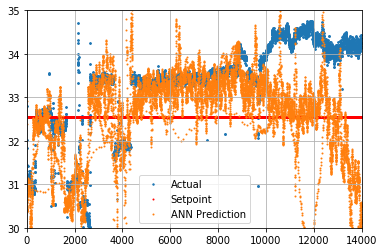

In [262]:
plt.scatter([i for i in range(len(Y_Data))],stz_Data2[stz_Data2.columns[49]].iloc[:14088-window_size]*Data2[Data2.columns[49]].std()+Data2[Data2.columns[49]].mean(),s=2,label='Actual')
plt.scatter([i for i in range(len(Y_Data))],stz_Data2[stz_Data2.columns[50]].iloc[:14088-window_size]*Data2[Data2.columns[50]].std()+Data2[Data2.columns[50]].mean(),s=1,color='red',label='Setpoint')
plt.scatter([i for i in range(len(Y_Data))],aa['Pred4']*Data2[Data2.columns[49]].std()+Data2[Data2.columns[49]].mean(),s=1,label='ANN Prediction')

plt.axis([0,14000,30,35])
plt.legend()
plt.grid(True)

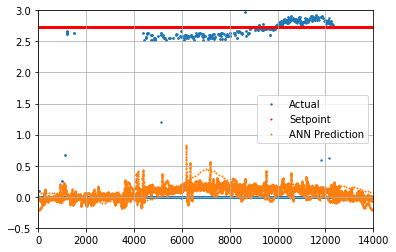

In [263]:
plt.scatter([i for i in range(len(Y_Data))],stz_Data2[stz_Data2.columns[51]].iloc[:14088-window_size]*Data2[Data2.columns[51]].std()+Data2[Data2.columns[51]].mean(),s=2,label='Actual')
plt.scatter([i for i in range(len(Y_Data))],stz_Data2[stz_Data2.columns[52]].iloc[:14088-window_size]*Data2[Data2.columns[52]].std()+Data2[Data2.columns[52]].mean(),s=1,color='red',label='Setpoint')
plt.scatter([i for i in range(len(Y_Data))],aa['Pred5']*Data2[Data2.columns[51]].std()+Data2[Data2.columns[51]].mean(),s=1,label='ANN Prediction')

plt.axis([0,14000,-.5,3])
plt.legend()
plt.grid(True)

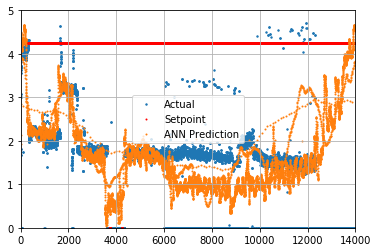

In [264]:
plt.scatter([i for i in range(len(Y_Data))],stz_Data2[stz_Data2.columns[53]].iloc[:14088-window_size]*Data2[Data2.columns[53]].std()+Data2[Data2.columns[53]].mean(),s=2,label='Actual')
plt.scatter([i for i in range(len(Y_Data))],stz_Data2[stz_Data2.columns[54]].iloc[:14088-window_size]*Data2[Data2.columns[54]].std()+Data2[Data2.columns[54]].mean(),s=1,color='red',label='Setpoint')
plt.scatter([i for i in range(len(Y_Data))],aa['Pred6']*Data2[Data2.columns[53]].std()+Data2[Data2.columns[53]].mean(),s=1,label='ANN Prediction')

plt.axis([0,14000,0,5])
plt.legend()
plt.grid(True)